## DL2 - Question 2
#### Plot one of the images in the test data, and then do inferencing to check what isthe prediction of the model on that single image
(https://umkc.box.com/s/10nrlk6216fncengv7qxbbw5o9vgc3hs

In [1]:
# Importing the libraries
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

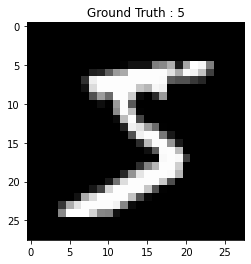

In [2]:
#loading the train and test data 
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0

In [5]:
#change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 18s 79ms/step - loss: 0.2714 - accuracy: 0.9157 - val_loss: 0.1153 - val_accuracy: 0.9617
Epoch 2/20
235/235 [==============================] - 16s 69ms/step - loss: 0.0938 - accuracy: 0.9704 - val_loss: 0.0874 - val_accuracy: 0.9717
Epoch 3/20
235/235 [==============================] - 16s 68ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0795 - val_accuracy: 0.9744
Epoch 4/20
235/235 [==============================] - 16s 67ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0755 - val_accuracy: 0.9780
Epoch 5/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0762 - val_accuracy: 0.9796
Epoch 6/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0808 - val_accuracy: 0.9795
Epoch 7/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0809 - val_accuracy:

In [8]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 9ms/step - loss: 0.1152 - accuracy: 0.9837
Evaluation result on Test Data : Loss = 0.11516662687063217, accuracy = 0.9836999773979187


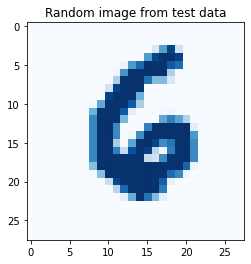

Image ater predection: 6


In [13]:
#Plotting one of the images in the test data, and then do inferencing to check what is the prediction of the model.
image_index = 130 #Taking random image
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Blues')
plt.title("Random image from test data")
plt.show()

#Predecting the image 
pred = model.predict(test_data[image_index].reshape(1,784))
print("Image ater predection:",pred.argmax())